<a href="https://colab.research.google.com/github/thyeaditungson29/mystudy_ADL2022/blob/main/UTS_ADL_Thyeadi_Tungson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Applied Deep Learning**


* Project: XNet: A convolutional neural network (CNN) implementation for medical X-Ray image segmentation suitable for small datasets

* Paper: https://paperswithcode.com/paper/xnet-a-convolutional-neural-network-cnn

* XNet Model: https://github.com/JosephPB/XNet

# **Download Data dan Model**

In [59]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1Wel_XsyE7HcEq0TkZWI61GABO4jOtj9C',
                                    dest_path='./dataset.hdf5')
gdd.download_file_from_google_drive(file_id='1cePD5E-T9mr5W0xPGuzEnUt8Glpvn23U',
                                    dest_path='./model.h5')

# **Loading Library**

In [57]:
import os, sys
import numpy as np
import h5py
import matplotlib.pyplot as plt

#import Keras sub-modules
from keras.models import Model #functional API for Keras (best for greater flexibility)
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense #'main' layers
from keras.layers import BatchNormalization, Dropout #regulartisation layers
from keras.layers import Activation
from keras.optimizers import * #import all optimisers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger #callbacks for model performance analysis
from keras.metrics import categorical_accuracy #metrics for model performance
from keras import backend as K #gives backend functionality
from keras import losses #imports pre-defined loss functions
from keras.models import load_model #allows pre-trained models to be called back

In [64]:
hdf5_path = "./dataset.hdf5" ## this is our h5 file containing training and testing data
dataset = h5py.File(hdf5_path , 'r')

classes = 3

test_images = dataset['test_img'][:]
no_images, height, width, channels = test_images.shape

test_labels =dataset['test_label'][:].reshape(-1,height*width, classes )
print('Dimensi dari Test Image',test_images.shape)
print('Dimensi dari Test Label',test_labels.shape)
dataset.close()

Dimensi dari Test Image (22, 200, 200, 1)
Dimensi dari Test Label (22, 40000, 3)


In [65]:
model = load_model("./model.h5")

In [66]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 200, 200, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 200, 200, 64  256        ['conv2d_1[0][0]']               
 rmalization)                   )                                                           

Berikut adalah 7 sample dari data test yang akan digunakan: 


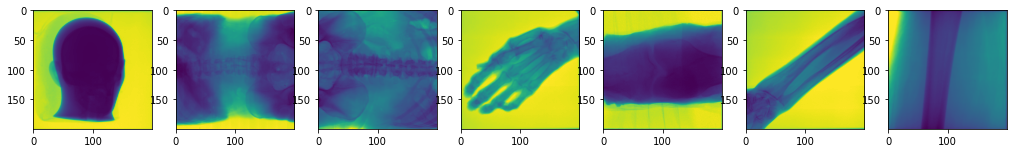

In [68]:
# Menampilkan 7 gambar dari data test
fig = plt.figure(figsize=(20, 20))
print("Berikut adalah 7 sample dari data test yang akan digunakan: ")
for i in range(7):
  fig.add_subplot(3, 8, i+1)
  plt.imshow(test_images[i].reshape(200,200))

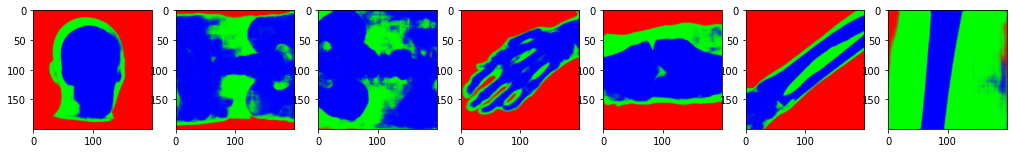

In [71]:
# Menampilkan 7 gambar dari prediksi
testing_image=np.empty([7,200,200,1])
for i in range(7):
    testing_image[i]=test_images[i]
testing_image=testing_image.reshape((7,200,200,1))
  
prediction2 = model.predict(testing_image)
prediction2 = prediction2.reshape((7,200,200,3))

fig = plt.figure(figsize=(20, 20))
for i in range(7):
  fig.add_subplot(3, 8, i+1)
  plt.imshow(prediction2[i])

In [77]:
test_index = 5

In [78]:
testing_image = test_images[test_index]

#as we are only running one image, we must reshape to shape (batch, height, width, channels)
testing_image = testing_image.reshape((1,200,200,1))

In [79]:
prediction = model.predict(testing_image)

#the prediction is a flattened array and so must be reshaped.
#there are 3 channels as we are actually outputting the probability map over all 3 classes.
prediction = prediction.reshape((200,200,3))

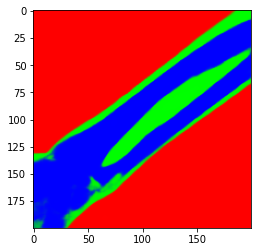

In [80]:
plt.imshow(prediction)

In [76]:
!python PostProcessing.py

python3: can't open file 'PostProcessing.py': [Errno 2] No such file or directory


In [81]:
def training_sample(train_images):
    fig, axs = plt.subplots(2, 5, figsize=(18, 8))
    axs[0,0].imshow(train_images[0].reshape(200,200), cmap='gray')
    axs[1,0].imshow(np.argmax(train_labels[0].reshape(200,200,3), axis = 2))
    axs[0,1].imshow(train_images[1].reshape(200,200), cmap='gray')
    axs[1,1].imshow(np.argmax(train_labels[1].reshape(200,200,3), axis = 2))
    axs[0,2].imshow(train_images[2].reshape(200,200), cmap='gray')
    axs[1,2].imshow(np.argmax(train_labels[2].reshape(200,200,3), axis = 2))
    axs[0,3].imshow(train_images[3].reshape(200,200), cmap='gray')
    axs[1,3].imshow(np.argmax(train_labels[3].reshape(200,200,3), axis = 2))
    axs[0,4].imshow(train_images[4].reshape(200,200), cmap='gray')
    axs[1,4].imshow(np.argmax(train_labels[4].reshape(200,200,3), axis = 2))
    plt.show()